# Drug Label Analysis, OpenFDA

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,8)
import numpy as np

import os
import pprint
import json
import pandas as pd
from pandas.io.json import json_normalize
pprint = pprint.pprint #Set up pretty print

In [2]:
df = pd.read_json('../test_data/drug_labels_all.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134239 entries, 0 to 99999
Columns: 111 entries, abuse to when_using
dtypes: float64(1), int64(2), object(108)
memory usage: 114.7+ MB


In [4]:
for c in df.columns:
    print(c)
#df.columns

abuse
accessories
active_ingredient
adverse_reactions
alarms
animal_pharmacology_and_or_toxicology
ask_doctor
ask_doctor_or_pharmacist
assembly_or_installation_instructions
boxed_warning
calibration_instructions
carcinogenesis_and_mutagenesis_and_impairment_of_fertility
cleaning
clinical_pharmacology
clinical_studies
components
contraindications
controlled_substance
dependence
description
diagram_of_device
disposal_and_waste_handling
do_not_use
dosage_and_administration
dosage_forms_and_strengths
drug_abuse_and_dependence
drug_and_or_laboratory_test_interactions
drug_interactions
effective_time
environmental_warning
food_safety_warning
general_precautions
geriatric_use
guaranteed_analysis_of_feed
health_care_provider_letter
health_claim
how_supplied
id
inactive_ingredient
indications_and_usage
information_for_owners_or_caregivers
information_for_patients
instructions_for_use
intended_use_of_the_device
keep_out_of_reach_of_children
labor_and_delivery
laboratory_tests
mechanism_of_action

In [5]:
df.iloc[0]

abuse                                                                                                      None
accessories                                                                                                None
active_ingredient                                             HPUS Active Ingredients Each dose contains equ...
adverse_reactions                                                                                          None
alarms                                                                                                     None
animal_pharmacology_and_or_toxicology                                                                      None
ask_doctor                                                                                                 None
ask_doctor_or_pharmacist                                                                                   None
assembly_or_installation_instructions                                                                   

In [6]:
len(df.iloc[0]['active_ingredient'])

123

In [7]:
# make a column equal to the total number of characters in strings in each row
df['total_chars'] = 0
# only consider string-like columns
for col in df.select_dtypes(include='object').columns:
    #print(col)
    #print(df[col].str.len())
    df['total_chars'] += np.nan_to_num(df[col].str.len())

In [8]:
df.head()

,abuse,accessories,active_ingredient,adverse_reactions,alarms,animal_pharmacology_and_or_toxicology,ask_doctor,ask_doctor_or_pharmacist,assembly_or_installation_instructions,boxed_warning,...,teratogenic_effects,troubleshooting,use_in_specific_populations,user_safety_warnings,version,veterinary_indications,warnings,warnings_and_cautions,when_using,total_chars
0,None,None,HPUS Active Ingredients Each dose contains equ...,None,None,None,None,None,None,None,...,None,None,None,None,1,None,"Warnings If symptoms persist or worsen, consul...",None,None,2072.0
1,None,None,None,6 ADVERSE REACTIONS Use of levocetirizine dihy...,None,13.2 Animal Toxicology Reproductive Toxicology...,None,None,None,None,...,"Teratogenic Effects: In rats and rabbits, levo...",None,8 USE IN SPECIFIC POPULATIONS 1.Renal Impairme...,None,1,None,None,5 WARNINGS AND PRECAUTIONS 1.Avoid engaging in...,None,64501.0
10,None,None,Active ingredients (in each 30 mL dose cup) Pu...,None,None,None,[Ask a doctor before use if you have liver dis...,None,None,None,...,None,None,None,None,1,None,Warnings Liver warning: This product contains ...,None,When using this product excitability may occur...,3766.0
100,None,None,Active Ingredients Avobenzone 3.0% Homosalate ...,None,None,None,Stop use and ask a doctor if rash occurs,None,None,None,...,None,None,None,None,1,None,For external use only. Do not use on damaged o...,None,When using this product keep out of eyes. Rins...,2982.0
1000,None,None,None,6 ADVERSE REACTIONS Common adverse reactions (...,None,None,None,None,None,WARNING: FETAL TOXICITY When pregnancy is dete...,...,None,None,8 USE IN SPECIFIC POPULATIONS Lactation: Advis...,None,1,None,None,5 WARNINGS AND PRECAUTIONS Angioedema: Discont...,None,65681.0


In [9]:
df.query('openfda.product_type == "HUMAN OTC DRUG"')

UndefinedVariableError: name 'openfda' is not defined

In [10]:
# estimate amazon pricing
df['total_chars'].sum()/100 * 0.01 #$320,000... that's way too much money.

319012.9817

In [11]:

df.query('total_chars < 50000').total_chars.sum()

974622541.0

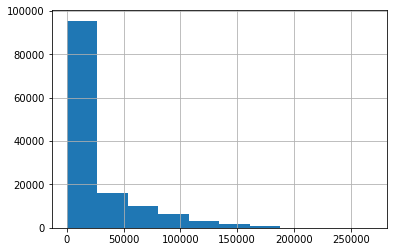

In [12]:
df.total_chars.hist()